In [1]:
set.seed(361)
suppressPackageStartupMessages(library(tidyverse))
options(scipen=99999)

# Q1

In [2]:
sum <- 0
vec <- c()
for(i in 1:1000){
    sum <- sum + ifelse(runif(1) <= 0.7, 1, 0)
    vec[i] <- sum/i
}
sum/1000

[1] 0.703

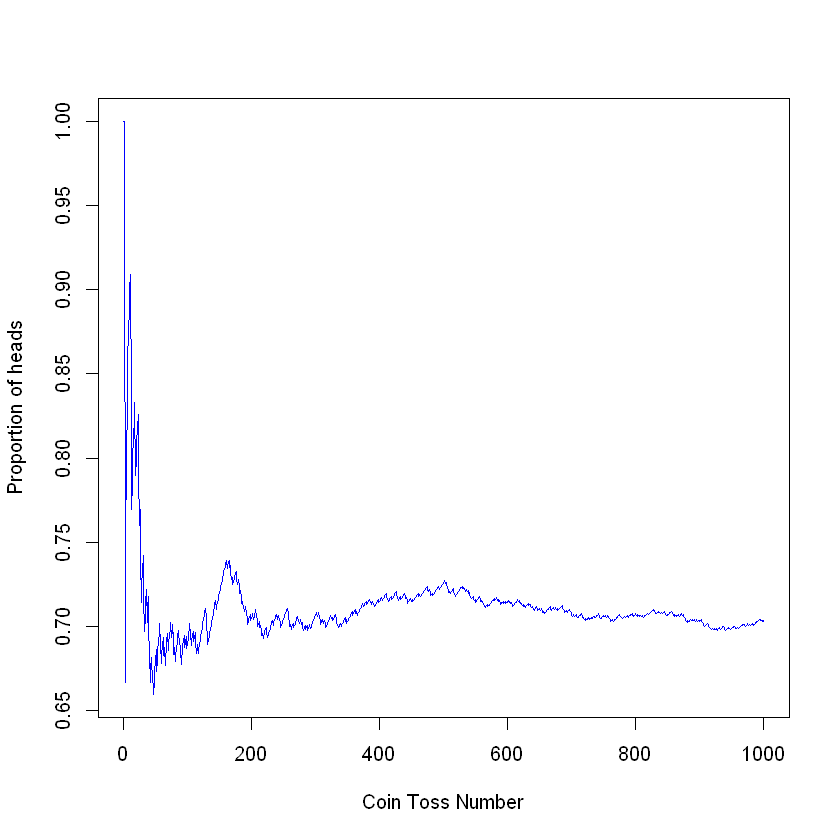

In [3]:
plot(vec, type = "l", col = "Blue", xlab = "Coin Toss Number", ylab="Proportion of heads")

# Q2

In [4]:
n <- 10^5
g <- function(x){
    if(x>5) return(1)
    else return(0)
}
k <- rgamma(n, 2, 1)
estimate <- mean(sapply(k, g))

In [5]:
estimate #near 0.04

[1] 0.041

$$
f(x) = \frac{xe^{-x}}{ \int_{5}^{\infty} xe^{-x} \,dx } = \frac{xe^{-x}}{0.04} = 25xe^{-x}
$$

$$
 \Rightarrow f(x)/g(x) = \frac{25xe^{-x}}{\frac{1}{\theta} e^{-\frac{x}{\theta}}} \Rightarrow \theta=2 \Rightarrow 50xe^{-\frac{x}{2}}
$$

$$
derivative \Rightarrow 50e^{-\frac{x}{2}}(1-\frac{x}{2}) = 0 
$$

$$
\Rightarrow x = 2
$$

In [6]:
f <- function(x){
    1/0.04 * x * exp(-x)
}

g <- function(x, theta){
    1/2*exp(-x*1/2)
}

c <- f(2)/g(2)

In [7]:
x <- c()

for(i in 1:100){
    repeat{
        u <- runif(1)
        repeat{
            y <- rexp(1, 1/2) 
            if(y > 5) break
        }
        if(u <= f(y)/(c*g(y))) break
    }
    x[i] <- y
}

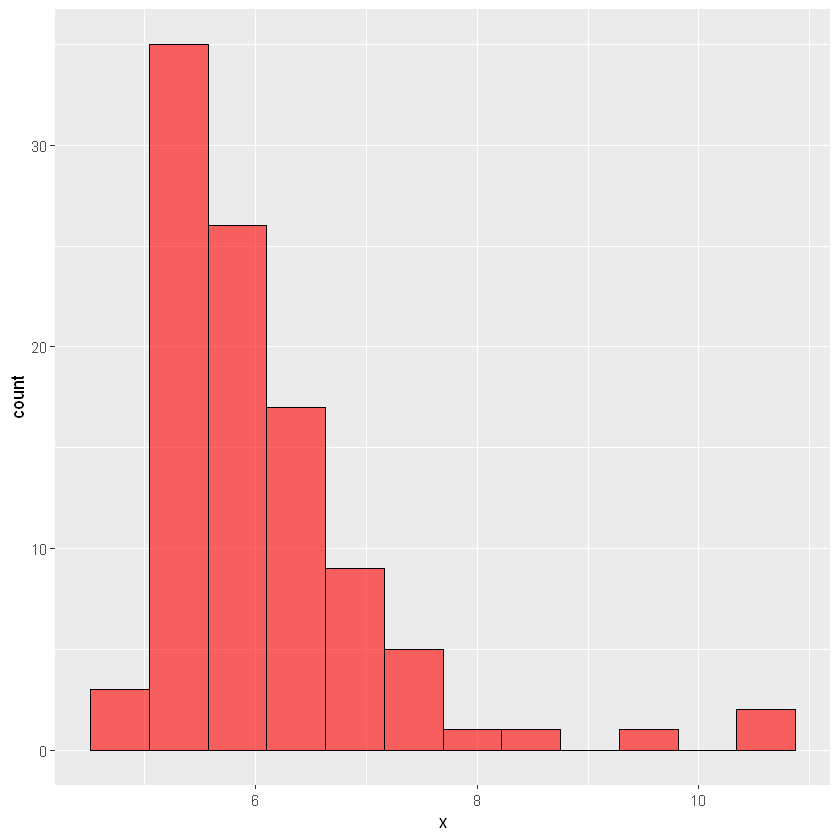

In [13]:
data.frame(x = x) %>% ggplot(aes(x=x)) + geom_histogram(bins=12,color="black", fill="red", alpha=0.6)

In [10]:
k <- c()
for(i in 1:1000){
    repeat{
        b <- rgamma(1, 2, 1)
        if(b > 5) break
    }
    k[i] <- b
}

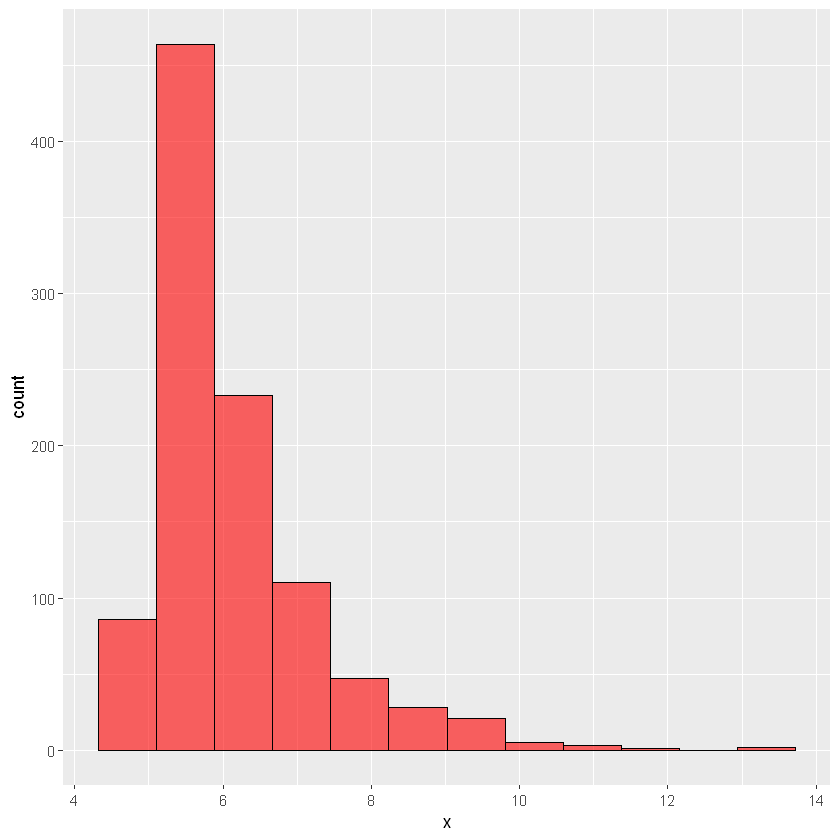

In [12]:
data.frame(x = k) %>% ggplot(aes(x=x)) + geom_histogram(bins=12,color="black", fill="red", alpha=0.6)

they are basically the same.

# Q3

In [11]:
f <- function(x, mu, s){
    1/(pi*s*(1+((x-mu)/s)^2))
}

mu <- -2
s <- 4
p1 <- 0.9; p2 <- 3

n <- 10**5

g1 <- function(x, p1){
    if(x < p1) return(1)
    else return(0)
}

g2 <- function(x, p2){
    if(x > p2) return(1)
    else return(0)
}

x <- rcauchy(n, mu, s)

prob1 <- mean(sapply(x, g1, p1))
prob2 <- mean(sapply(x, g2, p2))

est <- prob1 + prob2

In [12]:
est

[1] 0.91474

In [13]:
var(sapply(x, g1, p1)) + var(sapply(x, g2, p2)) + 2*cov(sapply(x, g1, p1), sapply(x, g2, p2))

[1] 0.07799151

# Q4

In [14]:
f <- function(u){
    (k/4) * (u/4)**(1-1) * exp((-u/4)**1)
}
n <- 10**5
k <- 1; lambda <- 4

In [15]:
u <- runif(n, 0, 0.9)

estimate <- mean(f(u))*(0.9)

var.estimate <- var(f(u))*(0.9)**2

cat("Estimate:", estimate, ", Var of estimate: ", var.estimate)

Estimate: 0.2014403 , Var of estimate:  0.0001702699

In [16]:
x <- runif(n/2, 0, 0.9)
y <- 0.9-x

z1 <- f(x)
z2 <- f(y)

ant <- (z1+z2)/2

ant.est <- mean(ant)*(0.9)
var.ant.est <- var(ant)*(0.9)**2
cat("Antithetic Estimate:", ant.est, ", Var of estimate: ", var.ant.est)

Antithetic Estimate: 0.2014842 , Var of estimate:  0.0000001438272

In [17]:
u <- runif(n, 0, 0.9)

estimate <- mean(f(u))*(0.9)

g <- function(u) u*exp(-u)

c_star <- -cov(f(u), g(u))/var(g(u))

term <- g(u) - (1/0.9)*integrate(g, 0, 0.9)$value

cont.est <- mean(f(u) + c_star * term)*(0.9)

var.cont.est <- var(f(u) + c_star * (g(u) - 1/0.9*integrate(g, 0,0.9)$value))

cat("Control variate Estimate:", cont.est, ", Var of estimate: ", var.cont.est)

Control variate Estimate: 0.2014864 , Var of estimate:  0.00001534617

In [18]:
cat("Variance reduction for antithetic (%):", 100*(var.estimate-var.ant.est)/var.estimate,
   "\nVariance reduction for control variate (%)", 100*(var.estimate-var.cont.est)/var.estimate)

Variance reduction for antithetic (%): 99.91553 
 Variance reduction for control variate (%) 90.98715

Since the variance of antithetic method is lower we have to choose that one.

# Q5

In [14]:
f <- function(f, a = -Inf, b = Inf, var.reduc = FALSE, type = NULL, g=NULL, plot=FALSE){
    n <- 10**5
    if(var.reduc == FALSE){
        if(a == -Inf & b == Inf){
            x <- rnorm(n)
            estimate <- mean(sapply(x, f))
            var.est <- var(sapply(x, f))
        } else if(a != -Inf & b == Inf){
            g <- function(x, p1){
                if(x > p1) return(1)
                else return(0)
            }
            x <- rnorm(n)
            estimate <- mean(sapply(f(x),g,a))
            var.est <- var(sapply(f(x),g,a))
        } else if(a == -Inf & b != Inf){
            g <- function(x, p1){
                if(x < p1) return(1)
                else return(0)
            }
            x <- rnorm(n)
            estimate <- mean(sapply(f(x),g,b))
            var.est <- var(sapply(f(x),g,b))
        } else{
            x <- runif(n/2, a, b)
            estimate <- (b-a)*mean(sapply(x, f))
            var.est <- var(sapply(x, f))
        }
        cat("Our estimate:",estimate,"\n Estimate variance:", var.est)
    }else if(var.reduc == TRUE & type =="Antithetic"){
        if(a == -Inf & b == Inf){
            cat("Changing both a,b to 100 as its not possible to use inf with antithetic variables.\n")
            a <- -100
            b <- 100
        } else if(a != -Inf & b == Inf){
            cat("Changing b to 100 as its not possible to use inf with antithetic variables.\n")
            b <- 100
        } else if(a == -Inf & b != Inf){
            cat("Changing a to 100 as its not possible to use inf with antithetic variables.\n")
            a <- -100
        } #since 100 is big enough to cover a very large portion of every pdf or function if convergent. 
        u <- runif(n/2, a, b)
        x <- f(u)
        y <- f(b-u)

        estimate <- mean(x)*(b-a)
        var.est <- var(x)

        antithetic <- (x+y)/2
        ant.estimate <- mean(antithetic)*(b-a)
        var.ant <- var(antithetic)

        var_reduction <- 100*((var.est-var.ant)/var.est)
        cat("Our estimate:",estimate,"\nEstimate variance:",var.est,"\nOur antithetic estimate:",ant.estimate,"\nAntithetic estimate variance:", var.ant, "\nAntithetic estimation achieved ",var_reduction,"% reduction in variance")
    } else if(var.reduc == TRUE & type =="Control" & typeof(g) == "closure"){
        if(a == -Inf & b == Inf){
            x <- rnorm(n)
            estimate <- mean(sapply(x, f))
            var.est <- var(sapply(x, f))
        } else if(a != -Inf & b == Inf){
            g <- function(x, p1){
                if(x > p1) return(1)
                else return(0)
            }
            x <- rnorm(n)
            estimate <- mean(sapply(f(x),g,a))
            var.est <- var(sapply(f(x),g,a))
        } else if(a == -Inf & b != Inf){
            g <- function(x, p1){
                if(x < p1) return(1)
                else return(0)
            }
            x <- rnorm(n)
            estimate <- mean(sapply(f(x),g,b))
            var.est <- var(sapply(f(x),g,b))
        } else{
            x <- runif(n/2, a, b)
            estimate <- (b-a)*mean(sapply(x, f))
            var.est <- var(sapply(x, f))
        }
            
        if(a == -Inf | b == Inf){
            return("Limits cannot be infinite when 'Control' type is used")
        }
        
        x <- runif(n, a, b)

        if(cor(f(x),g(x)) < 0.5){
            return("Correlation is lower than 0.5, use another g function.")
        } else if(cor(f(x),g(x)) >= 0.5) cat("Correlation between f and g is", cor(f(x),g(x)), "\n")

        c_star <- -cov(f(x),g(x)) / var(g(x))

        control.estimate = mean(f(x) + c_star * (g(x) - (1/(b-a))*integrate(g, a, b)$value))*(b-a)

        var.cont.est <- var(f(x) + c_star * (g(x) - integrate(g, a, b)$value))
        
        var_reduction <- 100*(var.est-var.cont.est)/var.est
        
        cat("Our estimate:",estimate,"\nEstimate variance:",var.est,"\nOur control estimate:",control.estimate,"\nControl estimate variance:", var.cont.est, "\nControl variates achieved ",var_reduction,"% reduction in variance")
    }
    if(plot){
        if(a == -Inf) a <- -5
        if(b == Inf) b <- 5
        ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + stat_function(fun = f) + geom_area(stat="function", fun=f, xlim=c(a, b), fill = "red", alpha=.6)
    }
}

Correlation between f and g is 1 
Our estimate: 1.914857 
Estimate variance: 0.05205438 
Our control estimate: 1.919145 
Control estimate variance: 0 
Control variates achieved  100 % reduction in variance

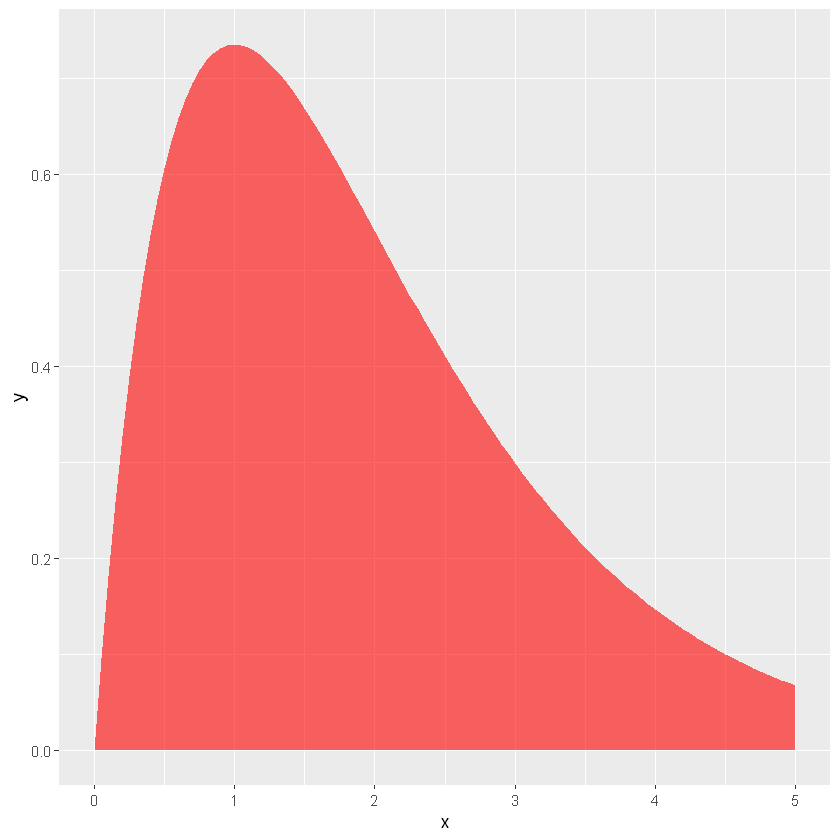

In [15]:
f(\(x) 2*x*exp(-x), a=0, b=5, var.reduc=TRUE, type="Control", plot=TRUE, g=\(x) x*exp(-x))

In [16]:
integrate(\(x) 2*x*exp(-x), 0, 5)

1.919145 with absolute error < 0.000000000000021

Changing b to 100 as its not possible to use inf with antithetic variables.
Our estimate: 9994.2 
Estimate variance: 3332.08 
Our antithetic estimate: 10000 
Antithetic estimate variance: 0 
Antithetic estimation achieved  100 % reduction in variance

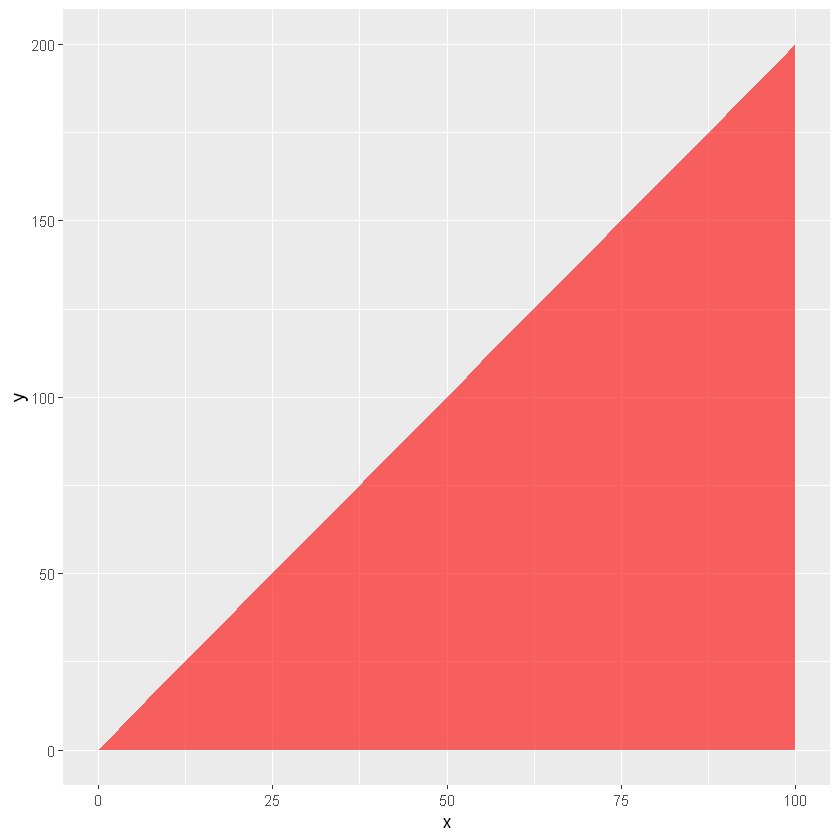

In [17]:
f(\(x) 2*x, a=0, b=Inf, var.reduc=TRUE, type="Antithetic", plot=TRUE, g=\(x) x)

In [19]:
integrate(\(x) 2*x, 0, 100)

10000 with absolute error < 0.00000000011

Our estimate: 9.585356 
 Estimate variance: 0.8223408

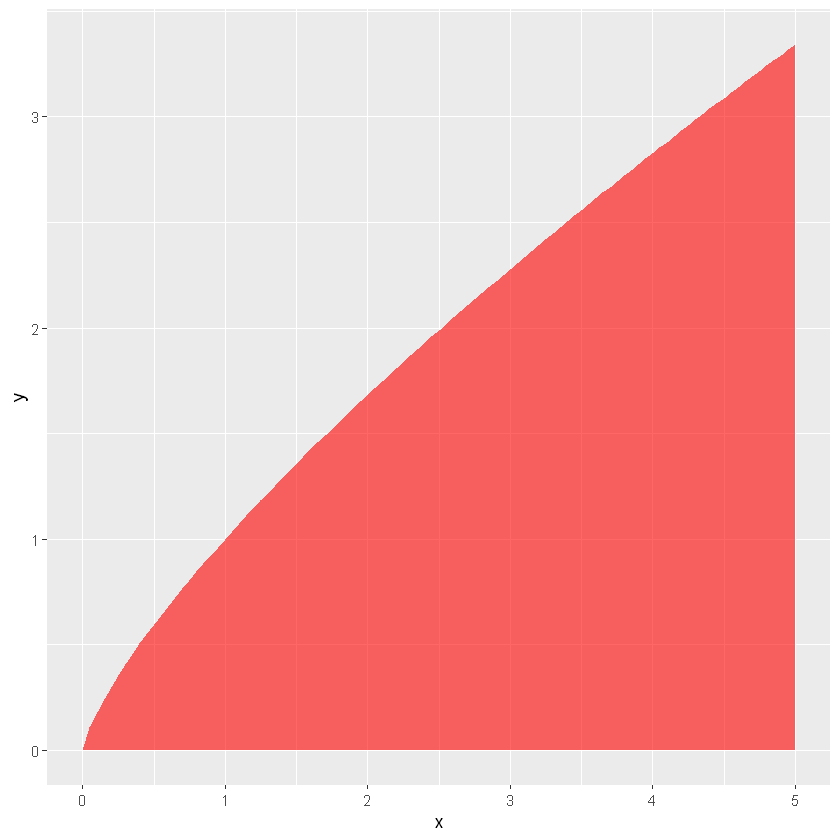

In [18]:
f(\(x) sqrt(x*sqrt(x)), a=0, b=5, var.reduc=FALSE, plot=TRUE)

In [20]:
integrate(\(x) sqrt(x*sqrt(x)), 0, 5)

9.553434 with absolute error < 0.00056